<a href="https://colab.research.google.com/github/T0n-k4/Ugliest-Nightmare-Prettiest-Dream/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(-3,3,100)

In [ ]:
y = x**2 + 2

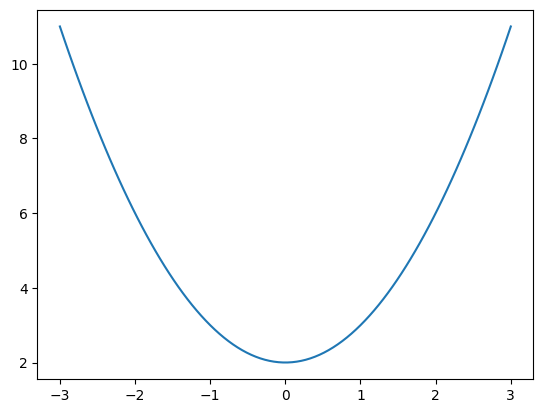

In [ ]:
plt.plot(x,y)

$f(x) = x^2 + 2$

$Area = \int_a^bf(x) dx$

$= \int_a^b (x^2+2) dx$

$= \left.\frac{x^3}{3}+2x\right\vert_1^2$

$= (\frac{8}{3}+4) - (\frac{1}{3}+2)$

$= \frac{13}{3}$

In [ ]:
13/3

4.333333333333333

To integrate the function $f(x)$ over the interval $[a,b]$ we

[1] find some value $M$ such that $f(x) < M$ over the interval $[a,b]$

[2] select a random number $x$ from a uniform distribution over the interval $[a,b]$

[3] select a random number y from a uniform distribution over the interval $[0,M]$

[4] determine if $y > f(x)$ or $y ≤ f(x)$

[5] repeat this process $N$ times, keeping track of the number of times $y ≤ f(x)$ or under the curve, successes $S$.

The estimated probability of success is then:

$\frac{S}{N}=\frac{\text{Area under curve}}{\text{Total area inside rectangle}} = \frac{\int_a^bf(x)dx}{M(b-a)}$

$\int_a^bf(x)dx = M(b-a)\frac{S}{N}$

In [ ]:
def f(x):
    y = x**2 + 2
    return y

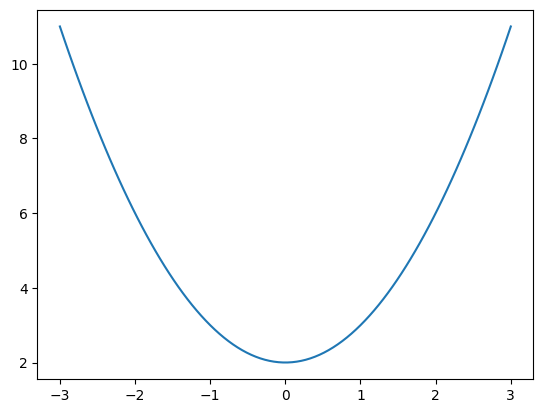

In [ ]:
plt.plot(x,f(x))

In [ ]:
M = 10

In [ ]:
a = 1
b = 2

In [ ]:
10*np.random.random()

3.6581869033396175

In [ ]:
x = a + (b-a)*np.random.random()

In [ ]:
x

1.6857306235736085

In [ ]:
y = M*np.random.random()

In [ ]:
x,y,f(x)

(1.6857306235736085, 2.6449372303423058, 4.841687735253867)

In [ ]:
y < f(x)

True

In [ ]:
N = 100_000
S = 0
for i in range(N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

M*(b-a)*(S/N)

4.3246

Comment: This cell can estimate the area under a curve over the interval using the Monte Carlo integration method.
*   Monte Carlo - Generate random 'x' within [a,b] and 'y' within [0,M].
*   Increments 'S' if 'y' is less than 'f(x)', showing the point under the curve
*   Calculates estimated area under f(x) over [a,b] using M(b-a)S/N, where M(b-a) is the area of the bounding rectangle and S/N is the proportion of points under the curve.







In [ ]:
def f(x):
    y = x**2 + 2
    return y

In [ ]:
def monte_carlo_integrate(f,a,b,N):

    N = 100000
    S = 0
    for i in range(N):

        x = a + (b-a)*np.random.random()
        y = M*np.random.random()

        S += (y < f(x))

    return M*(b-a)*(S/N)

In [ ]:
monte_carlo_integrate(f,1,2,1000)

4.3482

In [ ]:
from sympy import *

In [ ]:
x = Symbol('x')

In [ ]:
x

x

In [ ]:
integrate(x**2 + 2, (x,1,2))

13/3

In [ ]:
13/3

4.333333333333333

In [ ]:
integrate(x**3 + 3, (x,1,2))

27/4

In [ ]:
27/4

6.75

In [ ]:
x = 0

In [ ]:
def f(x):
    y = x**3 + 3
    return y

In [ ]:
monte_carlo_integrate(f,1,2,1000000)

6.7164

In [ ]:
N = 2000
S = 0
Z = np.zeros(N,)
for i in range(1,N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

    Z[i] = M*(b-a)*(S/i)

Comment: The Monte Carlo is modified using the N=2000 random points. It tracks the convergence of the estimated area with increasing number of points.
*   The array 'Z' captures how the estimated area converges towards the true area under the curve as more points are considered.

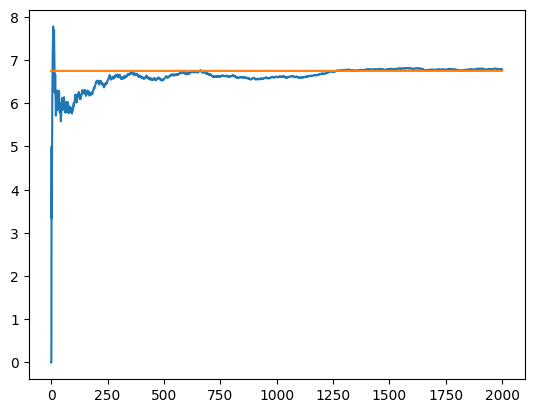

In [ ]:
plt.plot(Z)
plt.plot(6.75*np.ones(Z.shape))

Comment: This illustrate the convergence of the Monte Carlo integration estimate towards the true area under a curve and compare it against a known true area value.


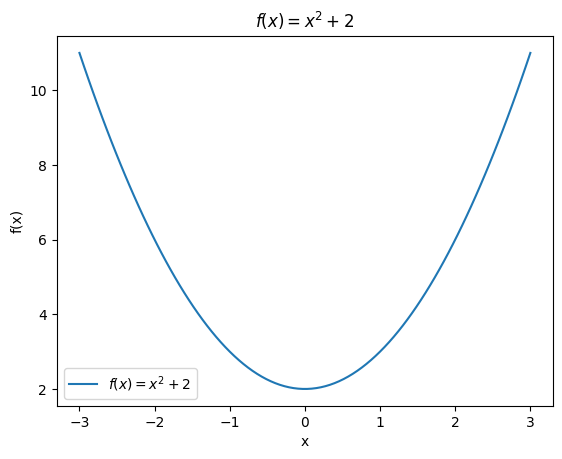

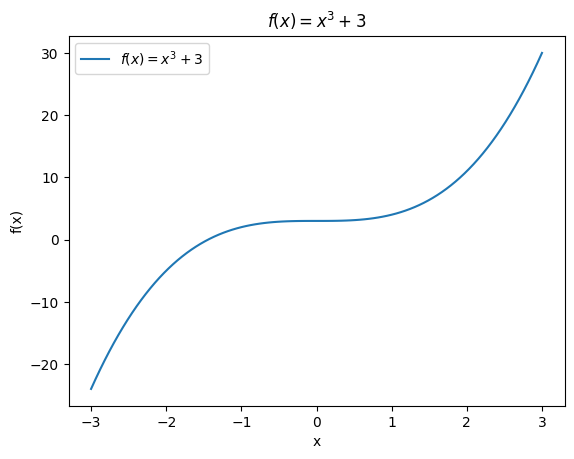

Exact Area under f1: 4.33333333333333
Estimated Area under f1: 4.2992
Exact Area under f2: 6.75000000000000
Estimated Area under f2: 6.74226


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate

# Define a general function for Monte Carlo integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Define the functions to be integrated
def f1(x):
    return x**2 + 2

def f2(x):
    return x**3 + 3

# Calculate exact and estimated areas
def calculate_areas(func, a, b, N, M):
    x_sym = Symbol('x')
    exact_area = integrate(func(x_sym), (x_sym, a, b)).evalf()
    estimated_area = monte_carlo_integrate(func, a, b, N, M)
    return exact_area, estimated_area

# Plotting function
def plot_function(func, title, a=-3, b=3):
    x = np.linspace(a, b, 100)
    y = func(x)
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# Plot the functions
plot_function(f1, "$f(x) = x^2 + 2$")
plot_function(f2, "$f(x) = x^3 + 3$")

# Calculate and print areas
exact_area_f1, estimated_area_f1 = calculate_areas(f1, 1, 2, 100000, 20)
exact_area_f2, estimated_area_f2 = calculate_areas(f2, 1, 2, 1000000, 20)

print("Exact Area under f1:", exact_area_f1)
print("Estimated Area under f1:", estimated_area_f1)
print("Exact Area under f2:", exact_area_f2)
print("Estimated Area under f2:", estimated_area_f2)


Comment: The cell shows a general approach of the Monte Carlo intergration for estimating the area under curves functions f(x)=x^2+2 and f(x)=x^3.

# Visualization

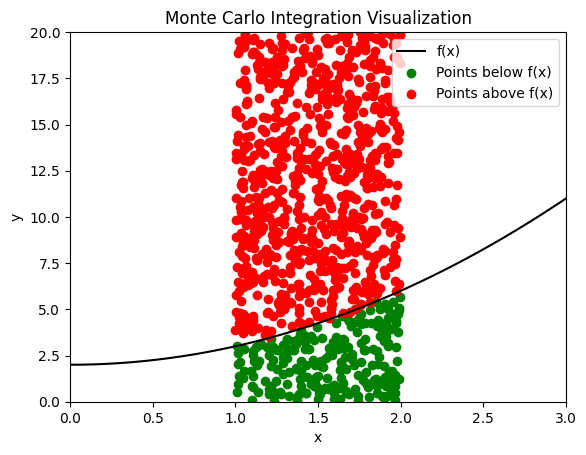

In [ ]:
# Function to plot points for Monte Carlo integration
def plot_monte_carlo(func, a, b, M, N):
    x_points = a + (b - a) * np.random.random(N)
    y_points = M * np.random.random(N)
    below = y_points < func(x_points)
    above = np.invert(below)

    # Plotting the function
    x = np.linspace(a - 1, b + 1, 400)
    y = func(x)
    plt.plot(x, y, label="f(x)", color='black')

    # Plotting the points
    plt.scatter(x_points[below], y_points[below], color='green', label='Points below f(x)')
    plt.scatter(x_points[above], y_points[above], color='red', label='Points above f(x)')

    # Setting up the plot limits and labels
    plt.xlim(a - 1, b + 1)
    plt.ylim(0, M)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Monte Carlo Integration Visualization")
    plt.legend()

    plt.show()

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters for Monte Carlo Integration
a, b, M, N = 1, 2, 20, 1000

# Plotting the Monte Carlo Integration
plot_monte_carlo(f, a, b, M, N)

Comment: This visually demonstrates how the Monte Carlo integration method approximates the area under the curve by comparing the proportion of random points that fell below the function to the total number of points within a known area.

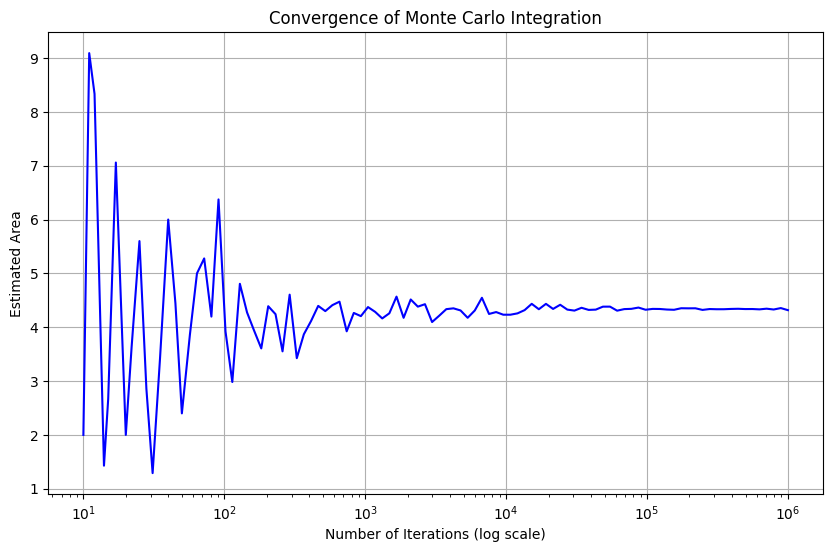

In [ ]:
# Function for Monte Carlo Integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters
a, b, M = 1, 2, 20
iterations = np.logspace(1, 6, 100, dtype=int)  # Using logarithmically spaced iterations for smoother curve
estimated_areas = []

# Calculate estimated areas for different numbers of iterations
for N in iterations:
    estimated_area = monte_carlo_integrate(f, a, b, N, M)
    estimated_areas.append(estimated_area)

# Plotting convergence
plt.figure(figsize=(10, 6))
plt.plot(iterations, estimated_areas, color='blue')
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Area')
plt.title('Convergence of Monte Carlo Integration')
plt.grid(True)
plt.show()

Comment: This showcase the convergence of the Monte Carlo integration method for making estimation of the area under the curve defined by f(x)=x^2+2 over the interval [1,2]. It utilizes progressively increasing numbers of iterations to showcase how the estimated area approaches a stable value as more points are sampled. This approach effectively demonstrates how increasing the number of random samples in Monte Carlo integration can lead to more accurate estimates of an integral.